In [179]:
# !pip install keras --upgrade
# !pip install tensorflow
# !pip install np_utils

In [260]:
import numpy as np
import tensorflow as tf
import keras as kr
import matplotlib as mpl

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D, Conv2D
from keras.callbacks import EarlyStopping
from keras import utils
from keras.models import Model, model_from_json

from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [181]:
np.random.seed(42)

In [182]:
from keras.datasets import mnist

In [183]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [184]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


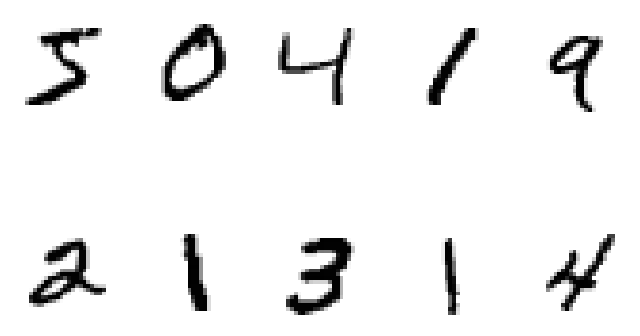

In [185]:
plt.figure(figsize = (8, 5))
for i in range(10):
  ax = plt.subplot(2, 5, i+1)
  ax.imshow(X_train[i], cmap = plt.cm.binary)
  ax.set_axis_off()
plt.show()

In [186]:
X_train = X_train/255
X_test = X_test/255

In [187]:
X_train.shape

(60000, 28, 28)

In [188]:
y_train_cat = utils.to_categorical(y_train, 10)
y_test_cat = utils.to_categorical(y_test, 10)

In [189]:
print(y_test)
print(y_test_cat)

[7 2 1 ... 4 5 6]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [190]:
model = Sequential([
  Flatten(input_shape = (28, 28, 1)), #non rgb
  Dense(128, activation = 'relu'),
  Dense(10, activation = 'softmax')
])

In [191]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [192]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [193]:
hist_dense = model.fit(X_train, y_train_cat, batch_size = 32, validation_split= 0.2,epochs= 15)

Epoch 1/15
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2877 - accuracy: 0.9165 - val_loss: 0.1475 - val_accuracy: 0.9588
Epoch 2/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1257 - accuracy: 0.9634 - val_loss: 0.1204 - val_accuracy: 0.9664
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0864 - accuracy: 0.9746 - val_loss: 0.1040 - val_accuracy: 0.9703
Epoch 4/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0639 - accuracy: 0.9812 - val_loss: 0.1043 - val_accuracy: 0.9698
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0488 - accuracy: 0.9854 - val_loss: 0.0894 - val_accuracy: 0.9753
Epoch 6/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0392 - accuracy: 0.9878 - val_loss: 0.0899 - val_accuracy: 0.9735
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.0944 - val_accuracy:

In [194]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0959 - accuracy: 0.9776


[0.09585461020469666, 0.9775999784469604]

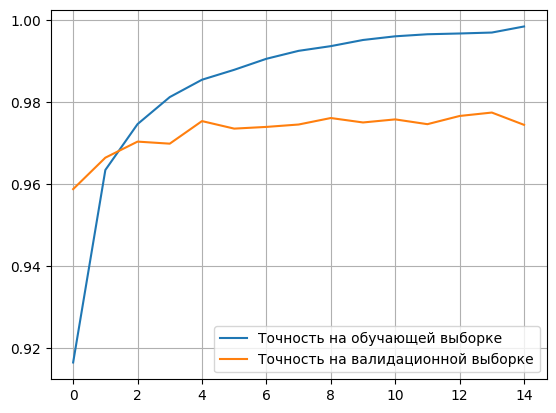

In [195]:
plt.plot(hist_dense.history['accuracy'], label = 'Точность на обучающей выборке')
plt.plot(hist_dense.history['val_accuracy'], label = 'Точность на валидационной выборке')
plt.xlabel = ('epoch')
plt.ylabel = ('accuracy')
plt.legend()
plt.grid(True)
plt.show()

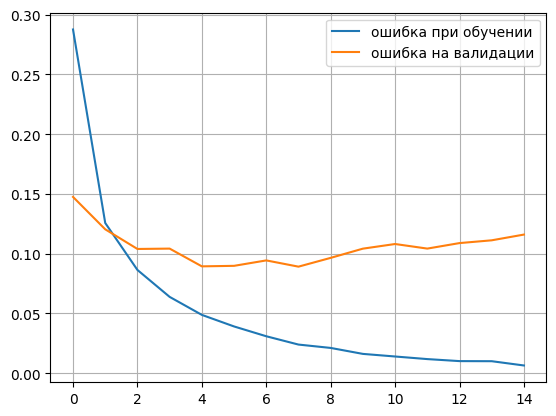

In [196]:
plt.plot(hist_dense.history['loss'], label = 'ошибка при обучении')
plt.plot(hist_dense.history['val_loss'], label = 'ошибка на валидации')
plt.xlabel = ('epoch')
plt.ylabel = ('loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 65ms/step
правильное значение 6


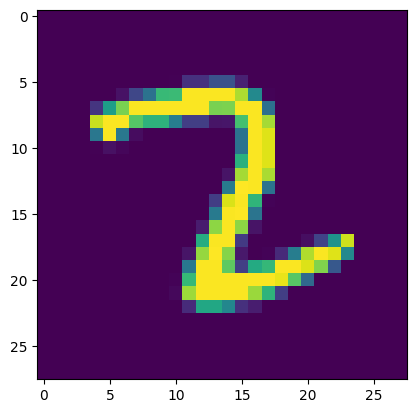

In [197]:
n = 688
x = np.expand_dims(X_test[n], axis = 0)
result = model.predict(x)
plt.imshow(X_train[n])
print("правильное значение",np.argmax(result))

In [198]:
predictions = model.predict(X_test)
#np.argmax нужен, так как в predict выводится массив вероятностей, естественно, нам нужно найти само предсказание, поэтому выбираем наибольшую вероятность
predictions = np.argmax(predictions, axis = 1)
print(predictions[:20])
print(y_test[:20])

313/313 [==============================] - 1s 2ms/step
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [199]:
mask = predictions == y_test
print(mask[:30])

X_false = X_test[~mask]
print(X_false.shape)


[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
(224, 28, 28)


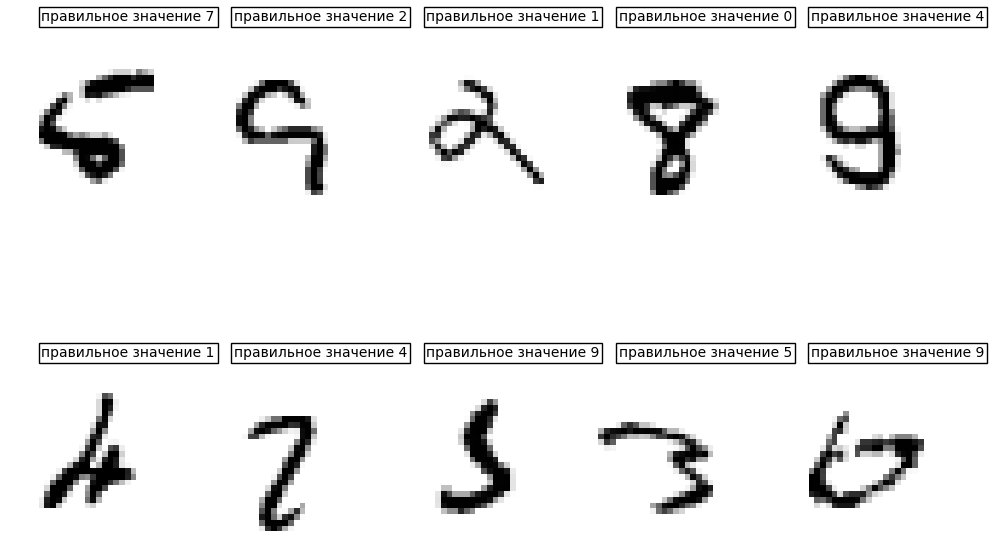

In [200]:

plt.figure(figsize = (12,8))
for i in range(10):
  ax = plt.subplot(2,5, i+1)
  ax.text(5, -5, f'правильное значение {y_test[i]}', bbox={'facecolor': 'white', 'pad': 2})
  ax.imshow(X_false[i], cmap = plt.cm.binary)
  ax.set_axis_off()
plt.show()


<Axes: >

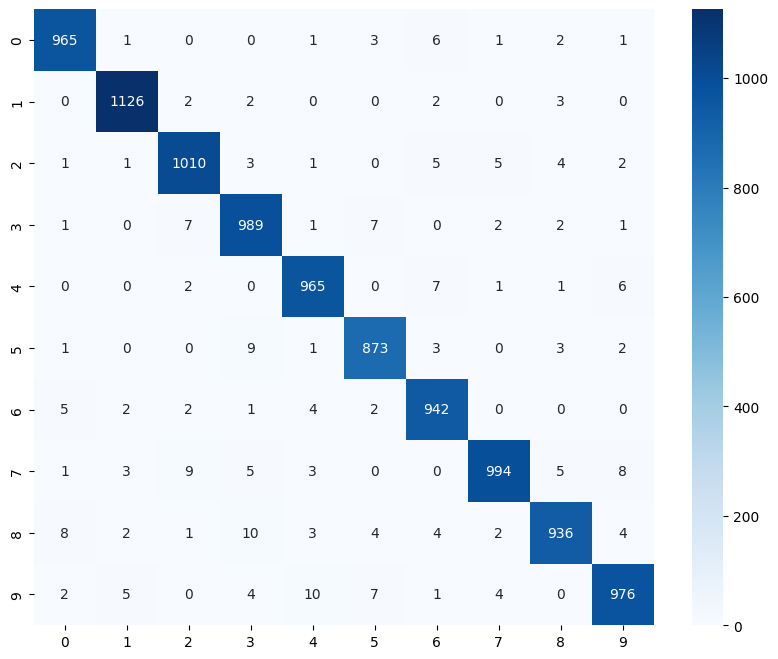

In [201]:
confusion = confusion_matrix(y_test, predictions)
plt.figure(figsize = (10,8))
sns.heatmap(confusion, annot = True, cmap = 'Blues', fmt = 'd')


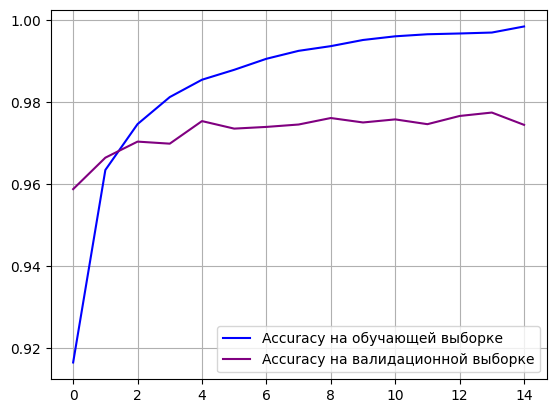

In [202]:
plt.plot(hist_dense.history['accuracy'], color = 'b', label = 'Accuracy на обучающей выборке')
plt.plot(hist_dense.history['val_accuracy'], color = 'purple', label = 'Accuracy на валидационной выборке')

plt.xlabel = ('Epochs')
plt.ylabel = ('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

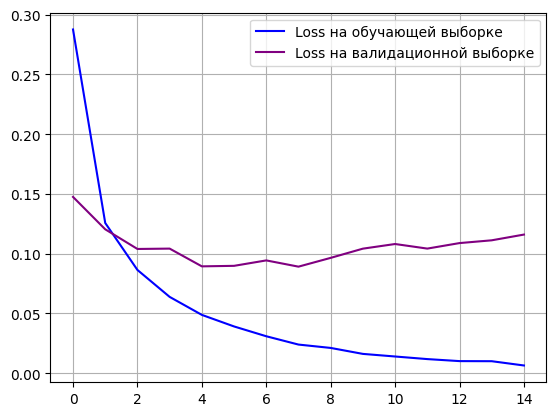

In [203]:
plt.plot(hist_dense.history['loss'], color = 'b', label = 'Loss на обучающей выборке')
plt.plot(hist_dense.history['val_loss'], color = 'purple', label = 'Loss на валидационной выборке')
plt.xlabel = ('Epochs')
plt.ylabel = ('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [204]:
model_dems_1 = Sequential([
    Flatten(input_shape = (28, 28, 1)),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.4),
    Dense(10, activation = 'softmax')
])

In [205]:
model_dems_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

In [206]:
model_dems_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics  = ['accuracy'])
hist_dense_1 = model_dems_1.fit(X_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 15)

Epoch 1/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5779 - accuracy: 0.8210 - val_loss: 0.1982 - val_accuracy: 0.9449
Epoch 2/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3097 - accuracy: 0.9107 - val_loss: 0.1590 - val_accuracy: 0.9527
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2622 - accuracy: 0.9244 - val_loss: 0.1360 - val_accuracy: 0.9613
Epoch 4/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2309 - accuracy: 0.9339 - val_loss: 0.1183 - val_accuracy: 0.9654
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2114 - accuracy: 0.9390 - val_loss: 0.1178 - val_accuracy: 0.9652
Epoch 6/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2027 - accuracy: 0.9414 - val_loss: 0.1125 - val_accuracy: 0.9682
Epoch 7/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1875 - accuracy: 0.9443 - val_loss: 0.1075 - val_accuracy:

In [207]:
model_dems_1.evaluate(X_test, y_test_cat)

313/313 [==============================] - 2s 5ms/step - loss: 0.0938 - accuracy: 0.9735


[0.09379871189594269, 0.9735000133514404]

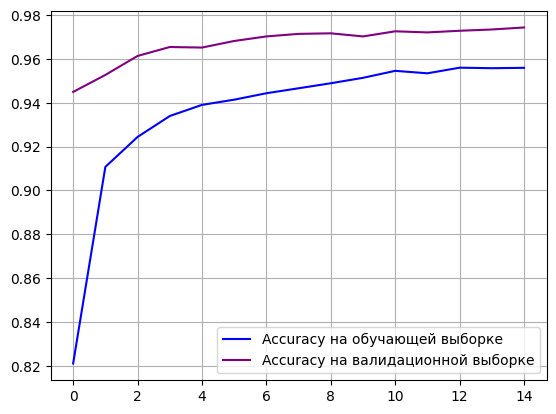

In [208]:
plt.plot(hist_dense_1.history['accuracy'], color = 'b', label = 'Accuracy на обучающей выборке')
plt.plot(hist_dense_1.history['val_accuracy'], color = 'purple', label = 'Accuracy на валидационной выборке')

plt.xlabel = ('Epochs')
plt.ylabel = ('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

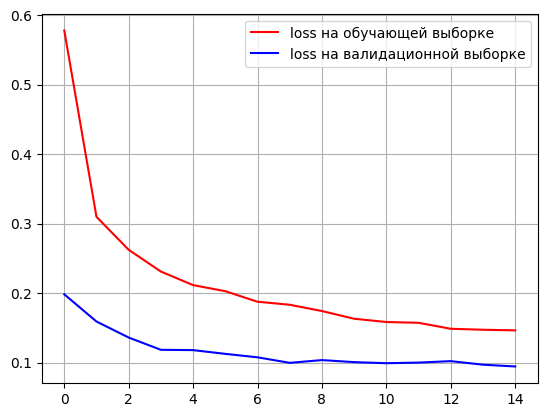

In [209]:
plt.plot(hist_dense_1.history['loss'], color = 'r', label = 'loss на обучающей выборке')
plt.plot(hist_dense_1.history['val_loss'], color = 'b', label = 'loss на валидационной выборке')
plt.xlabel = 'Epochs'
plt.ylabel = 'loss'
plt.legend()
plt.grid(True)
plt.show()

In [210]:
model_2 = Sequential([
    Flatten(input_shape = (28, 28, 1)),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               100480    
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [211]:
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics  = ['accuracy'])

In [212]:
early_stopping_callback =EarlyStopping(monitor = 'val_loss', patience = 3, verbose=1)

In [213]:
hist_2 = model_2.fit(X_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 25, callbacks = [early_stopping_callback])

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2722 - accuracy: 0.9204 - val_loss: 0.1409 - val_accuracy: 0.9597
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1126 - accuracy: 0.9656 - val_loss: 0.1045 - val_accuracy: 0.9688
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0781 - accuracy: 0.9756 - val_loss: 0.1251 - val_accuracy: 0.9662
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0581 - accuracy: 0.9816 - val_loss: 0.0979 - val_accuracy: 0.9706
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0882 - val_accuracy: 0.9744
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0376 - accuracy: 0.9878 - val_loss: 0.1043 - val_accuracy: 0.9721
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.1065 - val_accuracy:

In [214]:
model_2.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.9766


[0.08938738703727722, 0.9765999913215637]

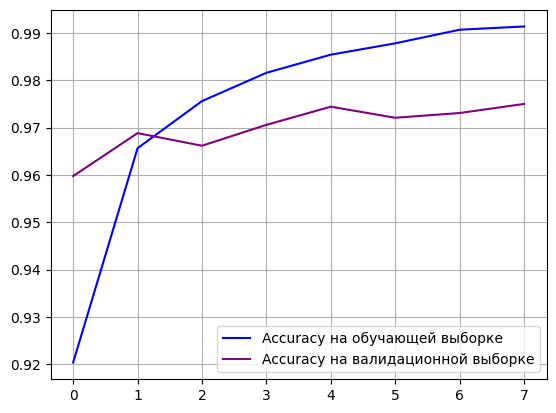

In [215]:
plt.plot(hist_2.history['accuracy'], color = 'b', label = 'Accuracy на обучающей выборке')
plt.plot(hist_2.history['val_accuracy'], color = 'purple', label = 'Accuracy на валидационной выборке')
plt.xlabel = ('Epochs')
plt.ylabel = ('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

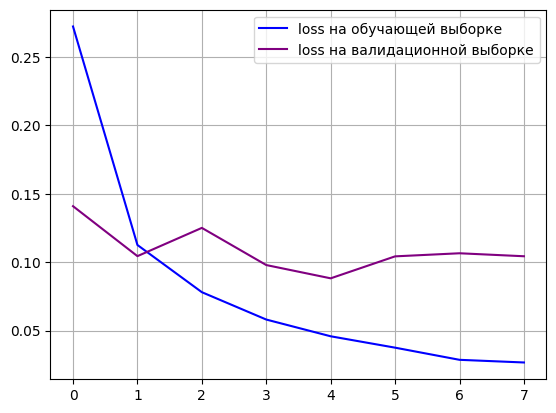

In [216]:
plt.plot(hist_2.history['loss'], color = 'b', label = 'loss на обучающей выборке')
plt.plot(hist_2.history['val_loss'], color = 'purple', label = 'loss на валидационной выборке')
plt.xlabel = ('Epochs')
plt.ylabel = ('loss')
plt.legend()
plt.grid(True)
plt.show()

In [217]:
# model_json = model_dems_1.to_json()
# json_file = open('MNIST.json', 'w')
# json_file.write(model_json)
# json_file.close()
# model_dems_1.save_weights('MNIST.h5')

In [218]:
# json_file = open('MNIST.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()

In [219]:
# loaded_model = model_from_json(loaded_model_json)
# loaded_model.load_weights('MNIST.h5')

# Convolutional neural network

In [220]:
# сверточная нейронная сеть
model_CNN = Sequential([
    Conv2D(32, (3,3), padding = "same", input_shape = (28, 28, 1), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), padding = "same", input_shape = (28, 28, 1), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), padding = "same", input_shape = (28, 28, 1), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(10, activation = 'softmax')
])
model_CNN.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 32)        

In [221]:
model_CNN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics  = ['accuracy'])

In [222]:
early_stopping_callback =EarlyStopping(monitor = 'val_accuracy', patience = 2, verbose=1)

hist_CNN = model_CNN.fit(X_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 20, callbacks = [early_stopping_callback])

Epoch 1/20
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2748 - accuracy: 0.9124 - val_loss: 0.0656 - val_accuracy: 0.9808
Epoch 2/20
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0873 - accuracy: 0.9735 - val_loss: 0.0438 - val_accuracy: 0.9880
Epoch 3/20
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0629 - accuracy: 0.9808 - val_loss: 0.0394 - val_accuracy: 0.9892
Epoch 4/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0495 - accuracy: 0.9850 - val_loss: 0.0373 - val_accuracy: 0.9906
Epoch 5/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0340 - val_accuracy: 0.9900
Epoch 6/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0390 - accuracy: 0.9878 - val_loss: 0.0343 - val_accuracy: 0.9905
Epoch 6: early stopping


In [223]:
model_CNN.evaluate(X_test, y_test_cat)

313/313 [==============================] - 3s 10ms/step - loss: 0.0290 - accuracy: 0.9903


[0.02896755374968052, 0.9902999997138977]

In [224]:
pred = model_CNN.predict(X_test)

pred = np.argmax(pred, axis = 1)

313/313 [==============================] - 3s 9ms/step


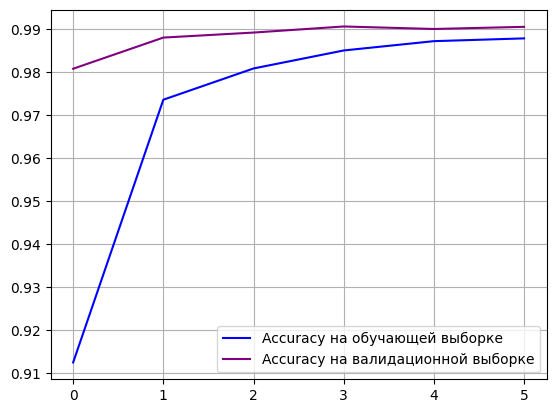

In [225]:
plt.plot(hist_CNN.history['accuracy'], color = 'b', label = 'Accuracy на обучающей выборке')
plt.plot(hist_CNN.history['val_accuracy'], color = 'purple', label = 'Accuracy на валидационной выборке')
plt.xlabel = ('Epochs')
plt.ylabel = ('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

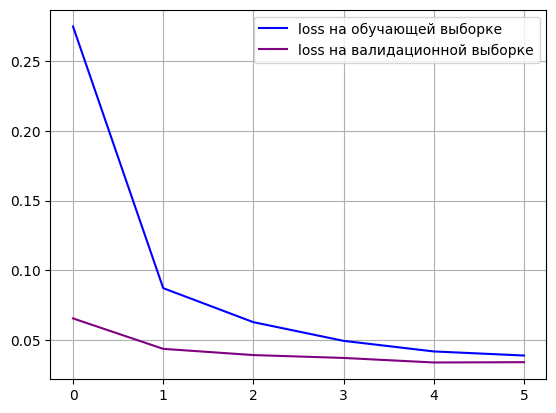

In [226]:
plt.plot(hist_CNN.history['loss'], color = 'b', label = 'loss на обучающей выборке')
plt.plot(hist_CNN.history['val_loss'], color = 'purple', label = 'loss на валидационной выборке')
plt.xlabel = ('Epochs')
plt.ylabel = ('loss')
plt.legend()
plt.grid(True)
plt.show()

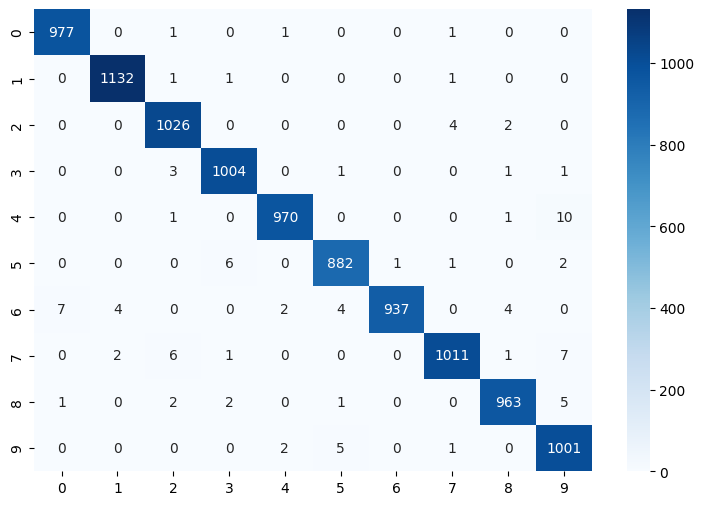

In [227]:
comf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(9,6))
sns.heatmap(comf_matrix, annot = True, cmap = 'Blues', fmt = 'd')

comf_matrix = confusion_matrix(y_test, pred)


In [228]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



1/1 [==============================] - 0s 27ms/step
Распознанная цифра 7


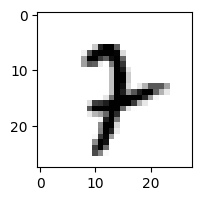

In [229]:
n=930
x = np.expand_dims(X_test[n], axis = 0)
res = model_CNN.predict(x)
print('Распознанная цифра', np.argmax(res))

plt.figure(figsize=(2,3))
plt.imshow(X_test[n], cmap = plt.cm.binary)
plt.show()

In [230]:
mask = pred == y_test
print(mask[:30])

X_false = X_test[~mask]
print(X_false.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
(97, 28, 28)


Правильное значение: 7


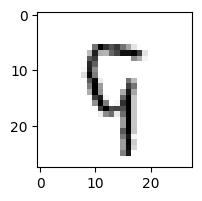

Правильное значение: 2


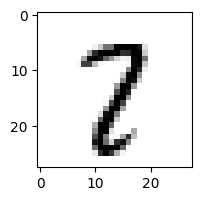

Правильное значение: 1


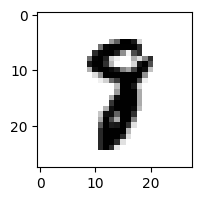

Правильное значение: 0


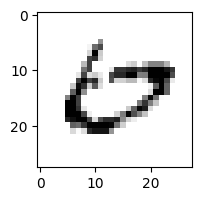

Правильное значение: 4


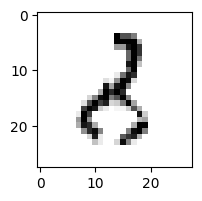

In [231]:
for el in range(5):
  plt.figure(figsize=(2,3))
  print("Правильное значение: " + str(y_test[el]))
  plt.imshow(X_false[el], cmap = plt.cm.binary)
  plt.show()

In [232]:
model_CNN_json = model_CNN.to_json()
json_file = open("MNIST_CNN.json","w")
json_file.write(model_CNN_json)
json_file.close()
model_CNN.save_weights("MNIST_CNN.h5")

In [233]:
json_file = open('MNIST_CNN.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('MNIST_CNN.h5')
loaded_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 288)             

In [234]:
activ_model = Model(inputs = loaded_model.input, outputs = loaded_model.layers[0].output)
activ_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


# Comparsion

In [259]:
import pandas as pd
results = {
    'NN type': ['Sequential', 'Sequential_dropout', 'Sequential earlyStopping', 'Convolution'],
    'Accuracy': [0.9776, 0.9735, 0.9766, 0.9903],

    'Loss:': [0.0959, 0.0938, 0.0894, 0.0290]
}
results = pd.DataFrame(results)
results

,NN type,Accuracy,Loss:
0,Sequential,0.9776,0.0959
1,Sequential_dropout,0.9735,0.0938
2,Sequential earlyStopping,0.9766,0.0894
3,Convolution,0.9903,0.0290
